In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [22]:
df = pd.read_csv("../data/raw/train_test.csv", parse_dates=True, dayfirst=False)
df.head()

,store_id,week_start,area_hier_desc,division_hier_desc,store_geography,carpark,soc_name,total_items,idle_hours,total_on_till_hours,total_transaction_count
0,124,2020-05-17,NORTHERN IRELAND REGION,IRELAND,NORTHERN IRELAND,1.0,SIMPLY FOOD,66943,56.657500,162.705556,7275
1,130,2020-01-26,MANCHESTER,NORTH,LANCASHIRE & CUMBRIA,0.0,LARGE - HIGH STREET,67949,64.993056,187.373333,9460
2,135,2019-11-17,MERSEYSIDE,NORTH,"MERSEYSIDE, NORTH WALES & IOM",1.0,MEDIUM - RETAIL PARK,45570,36.532222,118.333333,5812
3,136,2020-09-27,HOME COUNTIES SOUTH,SOUTH,HOME COUNTIES SOUTH,1.0,MAJOR - RETAIL PARK,131658,80.551944,326.306944,9168
4,176,2021-05-23,"NORTH WALES, CHESHIRE & IOM",CENTRAL,"MERSEYSIDE, NORTH WALES & IOM",1.0,MEDIUM - RETAIL PARK,56307,57.786111,149.586111,5671


In [23]:
df.week_start = pd.to_datetime(df.week_start, dayfirst=False)

In [24]:
df.dtypes

store_id                            int64
week_start                 datetime64[ns]
area_hier_desc                     object
division_hier_desc                 object
store_geography                    object
carpark                           float64
soc_name                           object
total_items                         int64
idle_hours                        float64
total_on_till_hours               float64
total_transaction_count             int64
dtype: object

In [27]:
sns.set()

<AxesSubplot:xlabel='week_start', ylabel='total_on_till_hours'>

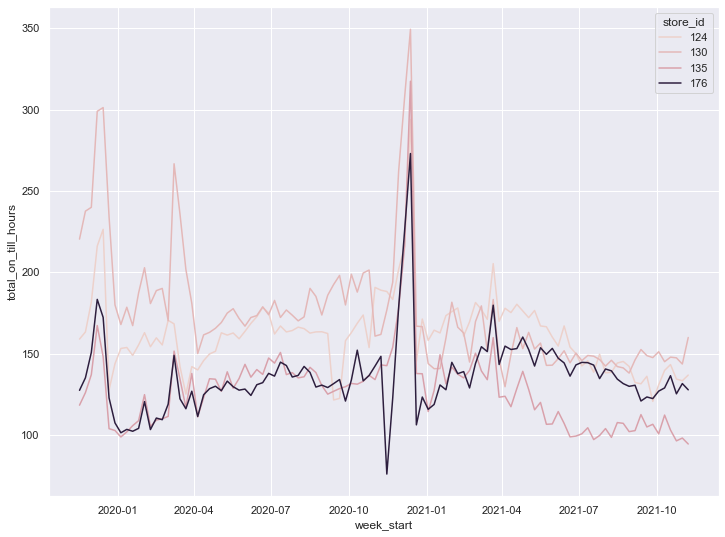

In [62]:
plt.figure(figsize=(12, 9))
sns.lineplot(x="week_start", y="total_on_till_hours", hue="store_id", data=df[df.store_id.isin([124, 130, 135, 176])])

In [117]:
df_test = df.copy()[df.store_id == 71]

## ACF and PACF in order to look at the AR and MA terms

In [118]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

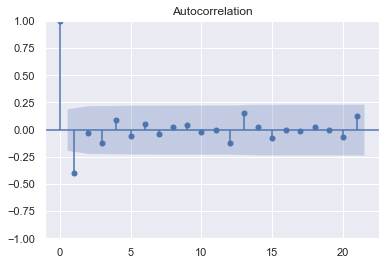

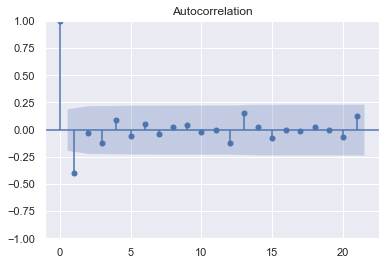

In [119]:
plot_acf(df_test.total_on_till_hours.apply(np.log10).diff().dropna())

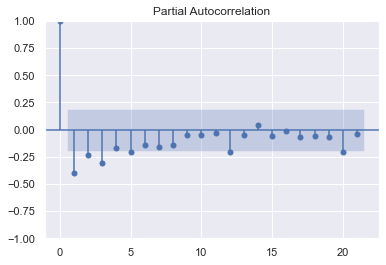

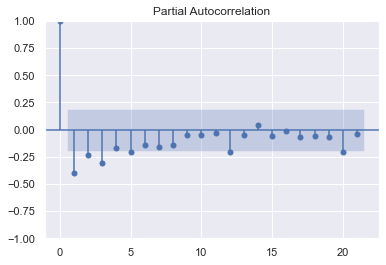

In [120]:
plot_pacf(df_test.total_on_till_hours.apply(np.log).diff().dropna(), method="ywm")

In [59]:
acf(df_124.total_transaction_count.apply(np.log))

array([ 1.        ,  0.13543765,  0.10724837,  0.01924444,  0.08929405,
       -0.14508556, -0.16680014, -0.12459372, -0.00102022, -0.09503093,
       -0.00654522, -0.06401247,  0.04709973, -0.24541298, -0.08607571,
       -0.02408743, -0.00560327,  0.05927874,  0.0239818 ,  0.02925847,
        0.02815626])

In [58]:
pacf(df_124.total_transaction_count.apply(np.log))

array([ 1.        ,  0.13675258,  0.09237759, -0.00656727,  0.08336212,
       -0.18143094, -0.16056805, -0.06769293,  0.05176633, -0.05875854,
        0.02048144, -0.09719739,  0.00937104, -0.31456731, -0.07873949,
        0.03826364, -0.02835101,  0.1524419 , -0.07794153, -0.11689912,
       -0.09315731])

In [65]:
df.nunique()

store_id                     600
week_start                   104
area_hier_desc                32
division_hier_desc             4
store_geography               31
carpark                        2
soc_name                      11
total_items                43977
idle_hours                 53267
total_on_till_hours        57142
total_transaction_count    12868
dtype: int64

In [66]:
areas = list(df.area_hier_desc.unique())

In [67]:
print(areas)

['NORTHERN IRELAND REGION', 'MANCHESTER', 'MERSEYSIDE', 'HOME COUNTIES SOUTH', 'NORTH WALES, CHESHIRE & IOM', 'CENTRAL LONDON', 'SCOTLAND NORTH', 'SOUTH MIDLANDS', 'NORTH YORKSHIRE', 'NORTH EAST', 'SCOTLAND WEST', 'SOUTH YORKSHIRE', 'BRISTOL & BATH', 'SOUTH WEST LONDON', 'LANCASHIRE & CUMBRIA', 'SOUTH EAST LONDON', 'SOUTH WEST', 'NORTH EAST LONDON', 'EAST ANGLIA', 'LEEDS', 'SCOTLAND CENTRAL & EAST', 'STAFFORDSHIRE & DERBYSHIRE', 'CENTRAL WEST', 'SOUTH COAST WEST', 'BIRMINGHAM', 'SOUTH EAST', 'CENTRAL EAST', 'SOUTH WALES', 'SOUTH COAST EAST', 'HOME COUNTIES NORTH', 'ROI REGION', 'NORTH WEST LONDON']


In [100]:
df[df.store_id == 6224].sort_values(by="week_start")

,store_id,week_start,area_hier_desc,division_hier_desc,store_geography,carpark,soc_name,total_items,idle_hours,total_on_till_hours,total_transaction_count
44687,6224,2019-11-17,MANCHESTER,NORTH,"MANCHESTER, CHESHIRE & STAFFS",1.0,SIMPLY FOOD,64048,83.513056,197.495556,9081
17984,6224,2019-11-24,MANCHESTER,NORTH,"MANCHESTER, CHESHIRE & STAFFS",1.0,SIMPLY FOOD,63734,81.790833,196.380000,8827
5524,6224,2019-12-01,MANCHESTER,NORTH,"MANCHESTER, CHESHIRE & STAFFS",1.0,SIMPLY FOOD,61984,84.603056,198.947222,9497
11698,6224,2019-12-08,MANCHESTER,NORTH,"MANCHESTER, CHESHIRE & STAFFS",1.0,SIMPLY FOOD,79033,95.141389,237.714167,9529
8140,6224,2019-12-15,MANCHESTER,NORTH,"MANCHESTER, CHESHIRE & STAFFS",1.0,SIMPLY FOOD,75922,82.230833,226.433611,7552
...,...,...,...,...,...,...,...,...,...,...,...
3990,6224,2021-10-10,MANCHESTER,NORTH,"MANCHESTER, CHESHIRE & STAFFS",1.0,SIMPLY FOOD,66855,62.446667,175.444722,8453
54242,6224,2021-10-17,MANCHESTER,NORTH,"MANCHESTER, CHESHIRE & STAFFS",1.0,SIMPLY FOOD,63492,60.496667,167.567500,8548
41682,6224,2021-10-24,MANCHESTER,NORTH,"MANCHESTER, CHESHIRE & STAFFS",1.0,SIMPLY FOOD,65871,60.666111,171.783889,8524
25259,6224,2021-10-31,MANCHESTER,NORTH,"MANCHESTER, CHESHIRE & STAFFS",1.0,SIMPLY FOOD,64587,56.654167,166.025556,8512


In [103]:
df[df.week_start >= pd.to_datetime("2021-11-07")].store_id.nunique()

563

In [106]:
print(set(df.store_id.unique()) - set(df[df.week_start >= pd.to_datetime("2021-11-07")].store_id.unique()))

{8332, 1296, 3094, 2969, 6554, 1436, 4637, 4381, 1821, 1568, 1067, 7980, 3887, 7223, 8125, 7870, 6211, 3269, 2119, 73, 9674, 2123, 9548, 7883, 2257, 5597, 9438, 6376, 2153, 4077, 111, 1010, 116, 1012, 8950, 247, 1407}


In [107]:
closed_stores = list(set(df.store_id.unique()) - set(df[df.week_start >= pd.to_datetime("2021-11-07")].store_id.unique()))

In [111]:
df_actual = df[~df.store_id.isin(closed_stores)]

In [112]:
df_actual.shape

(57715, 11)

In [113]:
df_manchester  = df_actual.copy()[df_actual.area_hier_desc == "MANCHESTER"]

In [114]:
manchester_stores = df_manchester.store_id.tolist()

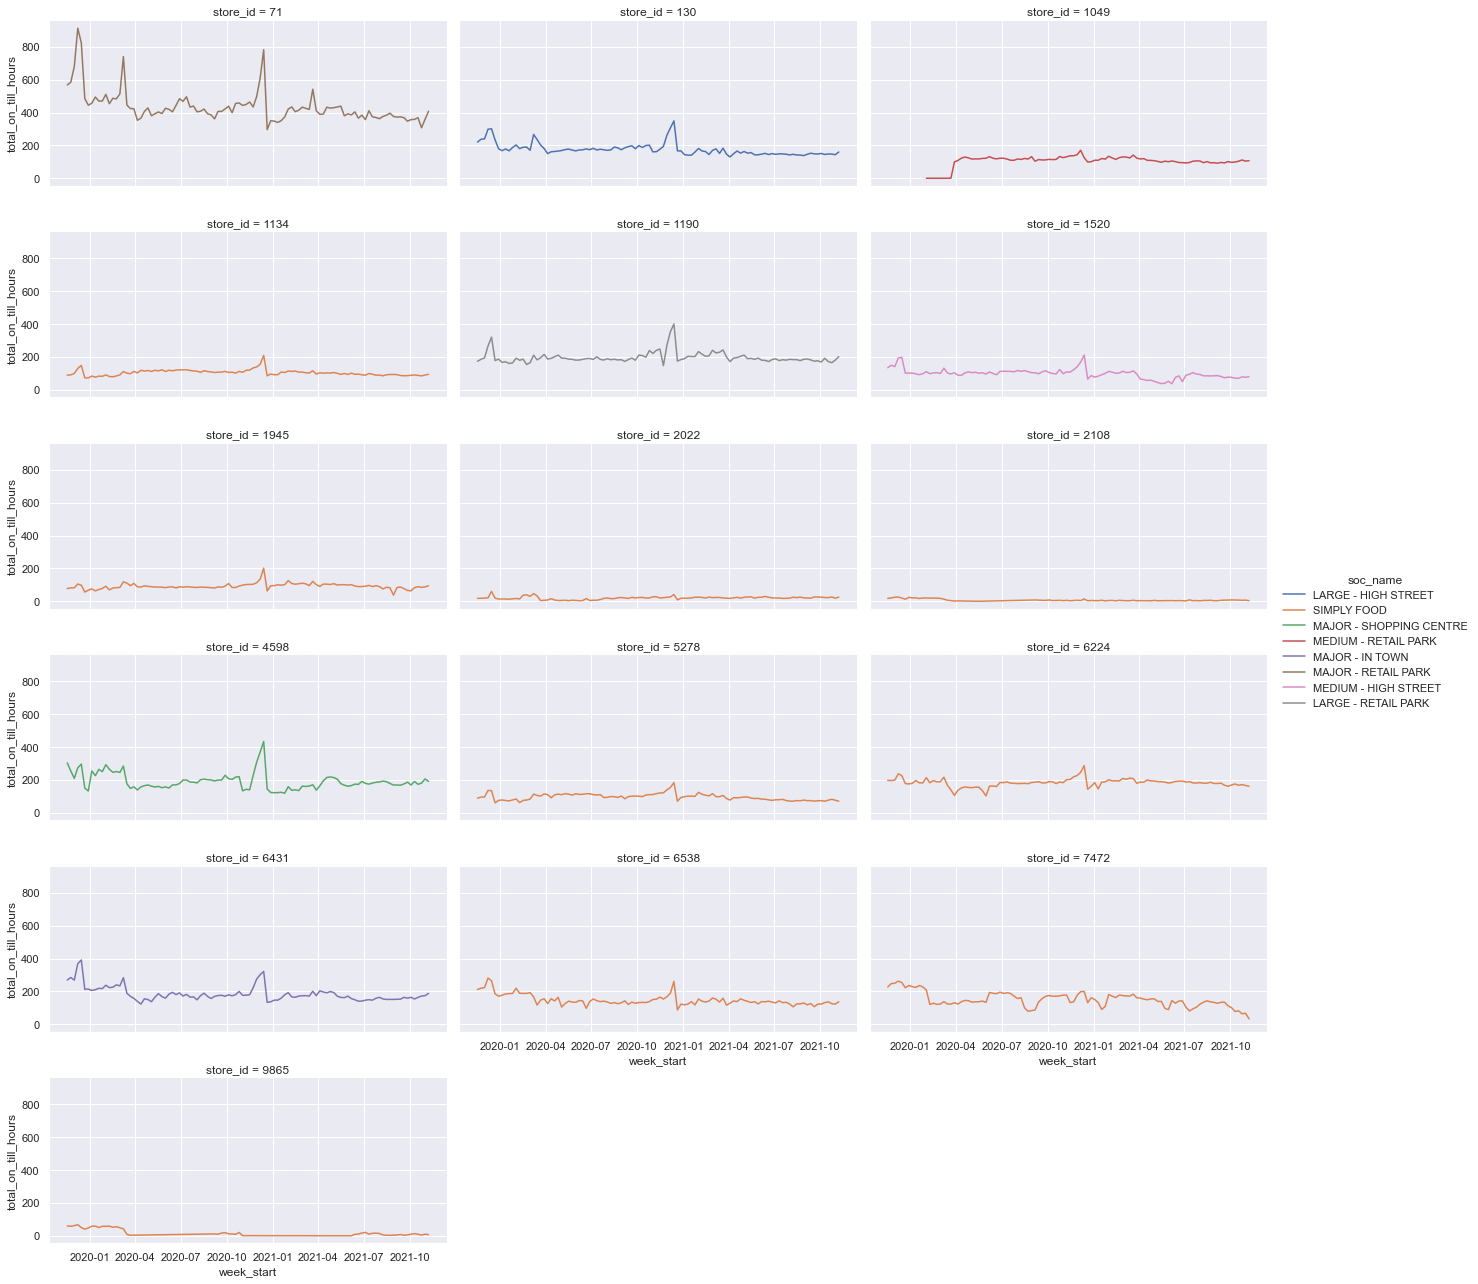

In [116]:
g = sns.FacetGrid(df_manchester, col="store_id", hue="soc_name", col_wrap=3, aspect=2)
g.map(sns.lineplot, "week_start", "total_on_till_hours")
g.add_legend()